# Introduction and Implementation to CNN

In [26]:
import numpy as np
import pandas as pd 
import keras
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
 

In [17]:
num_classes = 10
batch_size = 128
epochs =  24

In [5]:
img_rows, img_cols = 28, 28

In [6]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 8s 2us/step


In [20]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
input_shape = (img_rows, img_cols, 1)

In [15]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [18]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Defining model

In [30]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), 
                 activation = 'relu',
                 input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2))) 
model.add(Conv2D(32, kernel_size = (3,3), 
                 activation = 'relu',))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

In [22]:
model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adadelta(), 
              metrics = ['accuracy'])


In [25]:
hist = model.fit(X_train, y_train,
                batch_size = batch_size,
                epochs = epochs,
                verbose = 1,
                validation_data = (X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/24
60000/60000 [==============================] - 56s 935us/step - loss: 0.6797 - acc: 0.7523 - val_loss: 0.4580 - val_acc: 0.8266
Epoch 2/24
60000/60000 [==============================] - 54s 894us/step - loss: 0.4305 - acc: 0.8455 - val_loss: 0.3672 - val_acc: 0.8666
Epoch 3/24
60000/60000 [==============================] - 51s 849us/step - loss: 0.3749 - acc: 0.8668 - val_loss: 0.3416 - val_acc: 0.8772
Epoch 4/24
60000/60000 [==============================] - 53s 884us/step - loss: 0.3440 - acc: 0.8758 - val_loss: 0.3195 - val_acc: 0.8837
Epoch 5/24
60000/60000 [==============================] - 53s 887us/step - loss: 0.3214 - acc: 0.8854 - val_loss: 0.3129 - val_acc: 0.8868
Epoch 6/24
60000/60000 [==============================] - 53s 890us/step - loss: 0.3065 - acc: 0.8907 - val_loss: 0.2954 - val_acc: 0.8898
Epoch 7/24
60000/60000 [==============================] - 53s 887us/

In [27]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('test loss', score[0])
print('test accuracy', score[1])

test loss 0.2503216787517071
test accuracy 0.9114


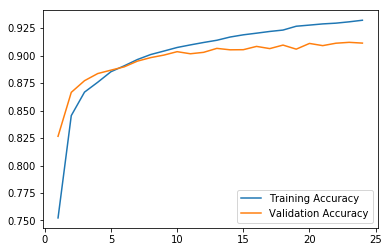

In [29]:
epoch_list = list(range(1, len(hist.history['acc']) + 1))
plt.plot(epoch_list, hist.history['acc'], epoch_list, hist.history['val_acc'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()